# Implementation will feature pyCombinatorial

In [1]:
pip install pyCombinatorial

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pyCombinatorial.utils import graphs, util
from scipy.spatial.distance import cdist
import os

# algorithm
from pyCombinatorial.algorithm import ant_colony_optimization

In [4]:
def generate_cities(n, seed=42):
    np.random.seed(seed)
    return np.random.uniform(0, 500, size=(n, 2))

def display_distance_matrix(matrix):
    df = pd.DataFrame(matrix)
    print(df.round(2))
    
def create_distance_matrix(cities):
    return cdist(cities, cities, metric='euclidean')

In [5]:
cities = generate_cities(20)
dist_matrix = create_distance_matrix(cities)
pd.DataFrame(dist_matrix).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,250.86,412.11,163.78,165.99,177.24,434.42,395.57,215.86,330.99,422.61,295.07,92.26,235.10,465.07,407.12,154.75,303.99,427.95,298.57
1,250.86,0.00,363.21,362.53,85.29,401.23,199.58,344.65,217.04,214.79,237.31,248.71,166.53,269.49,284.79,222.93,376.65,156.98,329.26,82.77
2,412.11,363.21,0.00,358.45,354.58,412.55,339.38,18.82,198.72,153.64,228.07,125.28,348.53,180.45,224.97,225.88,399.05,519.88,79.82,299.90
3,163.78,362.53,358.45,0.00,282.79,55.15,506.74,346.95,210.45,342.91,456.82,275.95,203.07,189.68,489.25,443.24,41.50,454.69,403.54,378.67
4,165.99,85.29,354.58,282.79,0.00,318.42,273.53,335.81,174.46,224.93,284.34,230.34,82.13,222.89,330.84,268.79,293.83,189.04,339.30,140.26
5,177.24,401.23,412.55,55.15,318.42,0.00,555.21,401.43,263.92,396.81,509.70,330.91,236.52,244.80,543.09,495.87,24.59,479.37,458.66,424.58
6,434.42,199.58,339.38,506.74,273.53,555.21,0.00,325.63,306.84,204.10,116.15,280.91,342.71,350.55,145.89,114.38,531.83,305.38,270.07,135.89
7,395.57,344.65,18.82,346.95,335.81,401.43,325.63,0.00,181.32,136.19,216.13,106.82,330.66,165.66,216.41,212.96,387.17,501.24,74.88,282.11
8,215.86,217.04,198.72,210.45,174.46,263.92,306.84,181.32,0.00,133.08,246.50,79.43,150.72,52.55,279.20,233.17,243.46,359.82,213.54,194.65
9,330.99,214.79,153.64,342.91,224.93,396.81,204.10,136.19,133.08,0.00,117.68,79.36,247.27,161.00,146.34,106.54,376.54,371.58,115.84,146.48


In [5]:
# This implementation thus far is for undirected TSP as dist_matrix[i][j] == dist_matrix[j][i])
# Later on I might make it an asymmetric distance matrix, as in dist_matrix[i][j] ≠ dist_matrix[j][i]

In [6]:
# aco parameters
def run_ant_colony(city_size, iterations=100, verbose=False):
    cities = generate_cities(city_size, seed=42)
    dist_matrix = create_distance_matrix(cities)
    
    # Parameters
    parameters = {
        'ants': min(50, max(10, city_size*2)),  # Scale colony size with problem
        'iterations': iterations,
        'alpha': 1,      # Pheromone 
        'beta': 2,        # Distance
        'decay': 0.05,    # Pheromone decay
        'local_search': True,  # local search improvement
        'verbose': verbose
    }
    
    start_time = time.time()
    route, distance = ant_colony_optimization(dist_matrix, **parameters)
    runtime = (time.time() - start_time) * 1000  # Convert to ms
    
    return distance, runtime, route

In [11]:
# path
aco_results_file = "aco_results.csv"
# number of samples
num_samples = 1
# city sizes that will be tested
aco_sizes = [6]
# seed
fixed_seed = 42

if os.path.exists(aco_results_file):
    aco_df = pd.read_csv(aco_results_file)
    if 'samples' not in aco_df.columns:
        aco_df['samples'] = 1
    print("starting")
else:
    aco_df = pd.DataFrame(columns=['cities', 'distance', 'runtime_ms', 'iterations', 'samples'])
    print("starting benchmark")

for size in aco_sizes:
    iterations = 100 if size <= 100 else 100
    
    print(f"\nProcessing {size} cities ({num_samples} samples, {iterations} iterations)...")
    
    # arrays
    runtimes = []
    distances = []
    
    for sample in range(num_samples):
        try:
            cities = generate_cities(size, seed=fixed_seed)
            dist_matrix = create_distance_matrix(cities)
            
            start = time.time()
            distance, runtime, route = run_ant_colony(
                size,
                iterations=iterations,
                verbose=False
            )
            runtime = (time.time() - start) * 1000 
            
            runtimes.append(runtime)
            distances.append(distance)
            
            print(f"Sample {sample+1}: {runtime:.2f} ms | Distance: {distance:.2f}")
            
        except Exception as e:
            print(f"Error in sample {sample+1}: {e}")
            continue
    
    if runtimes: 
        avg_runtime = round(np.mean(runtimes), 2)
        avg_distance = round(np.mean(distances), 2)
        
        existing = aco_df[aco_df['cities'] == size]
        
        if not existing.empty:
            old_samples = existing['samples'].values[0]
            old_runtime = existing['runtime_ms'].values[0]
            old_distance = existing['distance'].values[0]
            
            total_samples = old_samples + len(runtimes)
            new_runtime = round((old_runtime * old_samples + avg_runtime * len(runtimes)) / total_samples, 2)
            new_distance = round((old_distance * old_samples + avg_distance * len(runtimes)) / total_samples, 2)
            
            aco_df.loc[aco_df['cities'] == size, ['runtime_ms', 'distance', 'iterations', 'samples']] = [
                new_runtime, new_distance, iterations, total_samples
            ]
        else:
            # new entry
            new_row = pd.DataFrame([{
                'cities': size,
                'distance': avg_distance,
                'runtime_ms': avg_runtime,
                'iterations': iterations,
                'samples': len(runtimes)
            }])
            aco_df = pd.concat([aco_df, new_row], ignore_index=True)
        
        # 2 dp precision
        aco_df['distance'] = aco_df['distance'].apply(lambda x: round(float(x), 2))
        aco_df['runtime_ms'] = aco_df['runtime_ms'].apply(lambda x: round(float(x), 2))
        aco_df.to_csv(aco_results_file, index=False, float_format='%.2f')
        
        # display variance
        if len(runtimes) > 1:
            dist_std = round(np.std(distances), 2)
            time_std = round(np.std(runtimes), 2)
            print(f"Stats for {size} cities:")
            print(f"Distance std: ±{dist_std:.2f} | Runtime std: ±{time_std:.2f} ms")

# output
aco_df['distance'] = aco_df['distance'].map('{:.2f}'.format)
aco_df['runtime_ms'] = aco_df['runtime_ms'].map('{:.2f}'.format)
print("\nFinished")
print(aco_df[['cities', 'distance', 'runtime_ms', 'iterations', 'samples']])

starting

Processing 6 cities (1 samples, 100 iterations)...
Sample 1: 691.00 ms | Distance: 1205.34

Finished
    cities distance  runtime_ms  iterations  samples
0        4  1136.30      223.11       100.0       13
1        8  1386.16      681.03       100.0       13
2       12  1486.25     1245.94        50.0        8
3       16  1608.22     2303.78        50.0        8
4       10  1451.53     1531.19       100.0        6
5       20  1932.15     4025.21        50.0        8
6       50  2837.05    45294.66       100.0        6
7      100  3952.39   273073.65       100.0        1
8       35  2323.42    21539.58       100.0        6
9       70  3335.46   107477.61       100.0        1
10      85  3578.81   171747.97       100.0        1
11      23  2025.73     9448.91       100.0        6
12      24  2033.59    10377.54       100.0        6
13      25  2036.54    11515.33       100.0        6
14      28  2178.64    14081.62       100.0        6
15      30  2292.67    16327.80       100

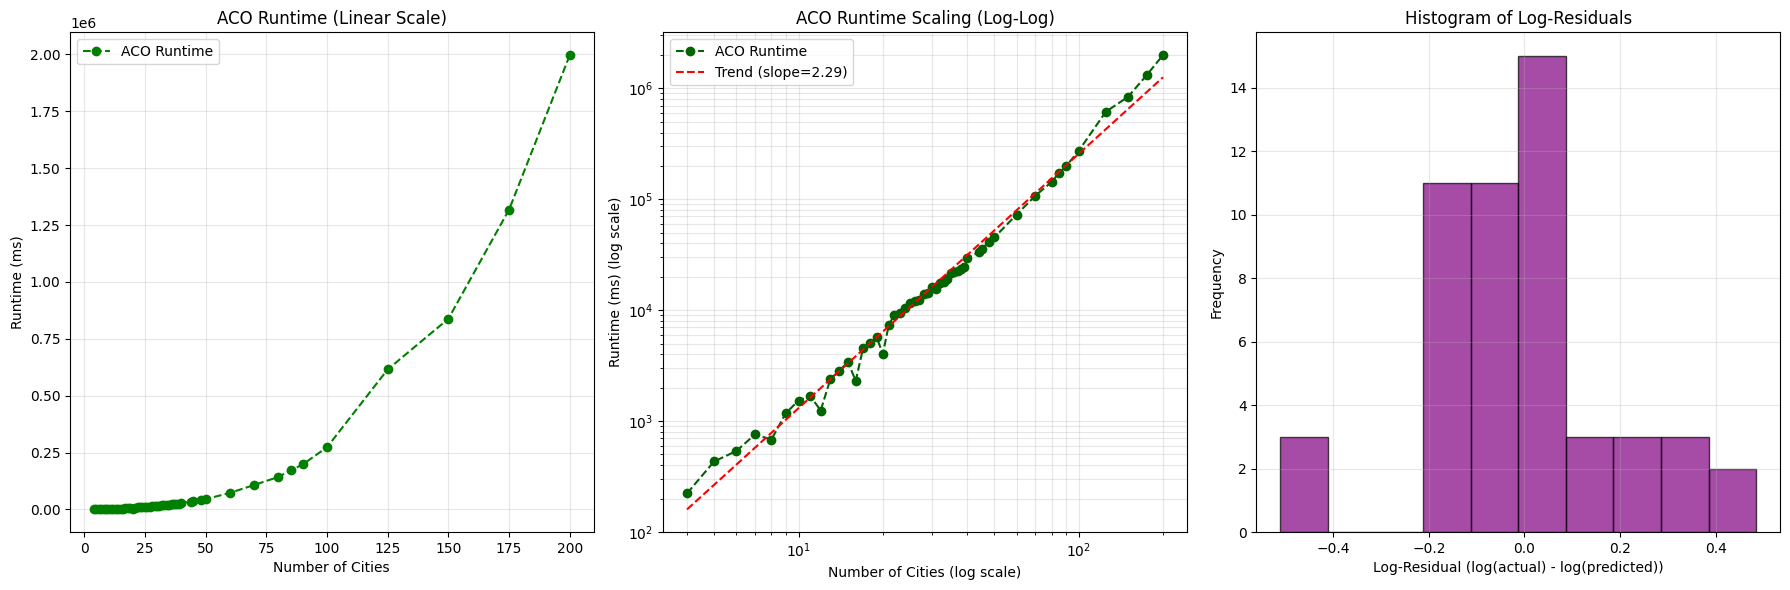

Estimated complexity exponent: 2.29
This suggests expected O(n²–n³) performance


In [12]:
# Path
aco_results_file = "aco_results.csv"

if os.path.exists(aco_results_file):
    df = pd.read_csv(aco_results_file)
    
    # filter values
    df = df.sort_values(by='cities')
    df = df[df['runtime_ms'] > 0] 
    
    log_cities = np.log(df['cities'])
    log_runtime = np.log(df['runtime_ms'])

    # trendline
    coeffs = np.polyfit(log_cities, log_runtime, 1)
    predicted_log_runtime = np.polyval(coeffs, log_cities)
    
    # residuals
    residuals = log_runtime - predicted_log_runtime
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Linear-scale plot (Left)
    ax1.plot(df['cities'], df['runtime_ms'], 
             marker='o', linestyle='--', 
             color='green', label='ACO Runtime')
    ax1.set_title('ACO Runtime (Linear Scale)')
    ax1.set_xlabel('Number of Cities')
    ax1.set_ylabel('Runtime (ms)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Log-log and trendline (Middle)
    ax2.loglog(df['cities'], df['runtime_ms'], 
               marker='o', linestyle='--', 
               color='darkgreen', label='ACO Runtime')
    
    trend = np.exp(coeffs[1]) * (df['cities'] ** coeffs[0])
    ax2.loglog(df['cities'], trend, 
               'r--', label=f'Trend (slope={coeffs[0]:.2f})')

    ax2.set_title('ACO Runtime Scaling (Log-Log)')
    ax2.set_xlabel('Number of Cities (log scale)')
    ax2.set_ylabel('Runtime (ms) (log scale)')
    ax2.grid(True, which='both', alpha=0.3)
    ax2.legend()

    # Histogram of residuals (Right)
    ax3.hist(residuals, bins=10, color='purple', edgecolor='black', alpha=0.7)
    ax3.set_title('Histogram of Log-Residuals')
    ax3.set_xlabel('Log-Residual (log(actual) - log(predicted))')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # estimated complexity
    print(f"Estimated complexity exponent: {coeffs[0]:.2f}")
    if coeffs[0] > 3.5:
        print("This suggests high-order polynomial or exponential behavior")
    elif coeffs[0] >= 2.0:
        print("This suggests expected O(n²–n³) performance")
    else:
        print("This suggests unexpectedly efficient scaling")

else:
    print("Not found")

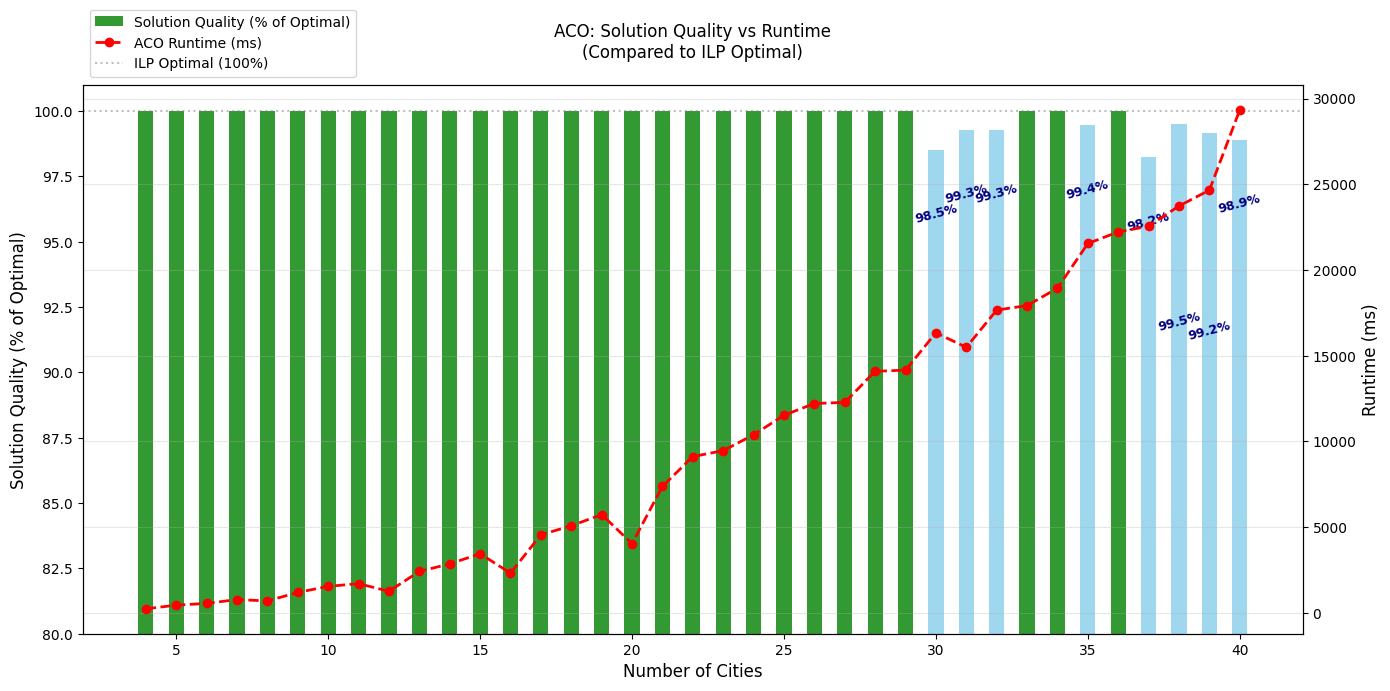

In [13]:
# libs
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# path for results
aco_file = "aco_results.csv"
ilp_file = "ilp_results.csv"

if os.path.exists(aco_file) and os.path.exists(ilp_file):
    aco_df = pd.read_csv(aco_file).sort_values('cities')
    ilp_df = pd.read_csv(ilp_file).sort_values('cities')
    
    # Merge datasets
    merged_df = pd.merge(aco_df, ilp_df, on='cities', suffixes=('_aco', '_ilp'))
    
    # calculate quality: ILP is optimal, so 100 * (optimal / actual)
    merged_df['optimality_pct'] = (merged_df['distance_ilp'] / merged_df['distance_aco']) * 100
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # color array and format labels
    colors = []
    display_values = []
    for pct in merged_df['optimality_pct']:
        if pct == 100:  # Exact 100%
            colors.append('green')
            display_values.append('')
        elif pct >= 99.9:  # Show as 99.9%
            colors.append('skyblue')
            display_values.append('99.9%')
        else:  # Show actual value with 1 decimal
            colors.append('skyblue')
            display_values.append(f'{pct:.1f}%')
    
    # Bar graph
    bar_width = 0.5
    bars = ax1.bar(merged_df['cities'],
                   merged_df['optimality_pct'],
                   width=bar_width,
                   color=colors,
                   alpha=0.8,
                   label='Solution Quality (% of Optimal)')
    
    heights = [bar.get_height() for bar in bars]
    
    for i, bar in enumerate(bars):
        if display_values[i]: 
            y_offset = -4  #  offset
            
            # Ccollisions with bars
            if i > 0 and abs(heights[i] - heights[i-1]) < 5:
                y_offset = -8 if heights[i] > heights[i-1] else -2
            if i < len(bars)-1 and abs(heights[i] - heights[i+1]) < 5:
                y_offset = -8 if heights[i] > heights[i+1] else -2
                
            ax1.text(bar.get_x() + bar.get_width() / 2., 
                    heights[i] + y_offset,
                    display_values[i],
                    ha='center', 
                    va='top' if y_offset > -5 else 'bottom',
                    color='navy', 
                    fontsize=9,
                    fontweight='bold',
                    rotation=15 if len(merged_df) > 10 else 0)
    
    # runtime
    ax2 = ax1.twinx()
    line, = ax2.plot(merged_df['cities'], merged_df['runtime_ms_aco'],
                     marker='o', linestyle='--',
                     color='red',
                     linewidth=2,
                     label='ACO Runtime (ms)')
    
    # formatting
    ax1.set_xlabel('Number of Cities', fontsize=12)
    ax1.set_ylabel('Solution Quality (% of Optimal)', fontsize=12)
    ax1.set_ylim(80, 101)  # You can adjust this based on your data
    ax2.set_ylabel('Runtime (ms)', fontsize=12)
    
    # Reference line - 100%
    ax1.axhline(100, color='gray', linestyle=':', alpha=0.5, label='ILP Optimal (100%)')
    
    # Legends
    lines = [bars, line, ax1.lines[-1]]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1.15))
    
    plt.title('ACO: Solution Quality vs Runtime\n(Compared to ILP Optimal)', pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

elif not os.path.exists(aco_file):
    print("Not found.")
else:
    print("Mising files")